In [116]:
import pandas as pd # for data analysis
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # visualization

In [117]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
df.shape

(891, 12)

In [119]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

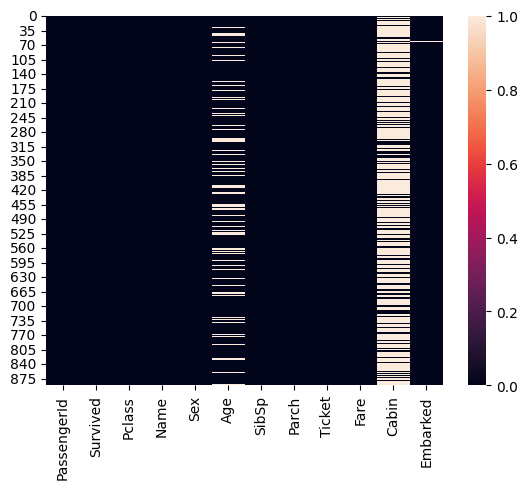

In [120]:
sns.heatmap(df.isna())

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

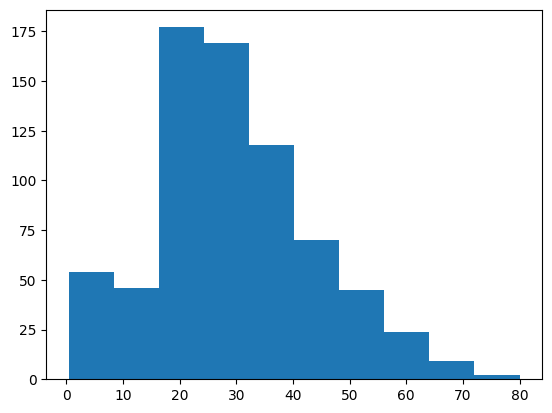

In [121]:
plt.hist(df['Age'])

In [122]:
# missing num imputation
# mean, median, mode, q1, q2, ffill, back

# oulier
# percentage


df["Age"] = df["Age"].fillna(df["Age"].mean())

In [123]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
df = df.drop(['PassengerId','Name','Cabin'], axis = 1)

In [125]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [126]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [127]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

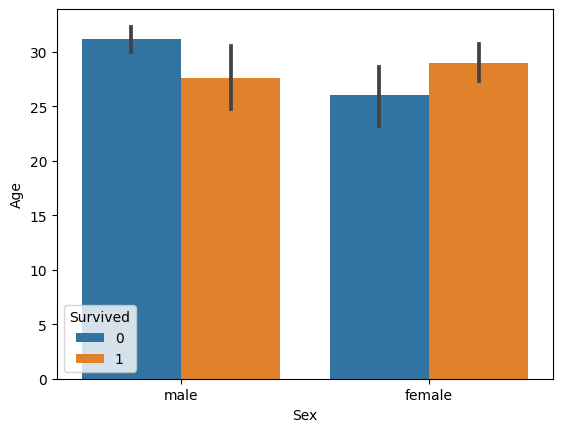

In [128]:
sns.barplot(x="Sex",y = "Age",hue="Survived",data = df)

In [129]:
df = df.dropna(axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,22.0,1,0,A/5 21171,7.2500
1,1,1,female,38.0,1,0,PC 17599,71.2833
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,0,113803,53.1000
4,0,3,male,35.0,0,0,373450,8.0500


In [130]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

<AxesSubplot:>

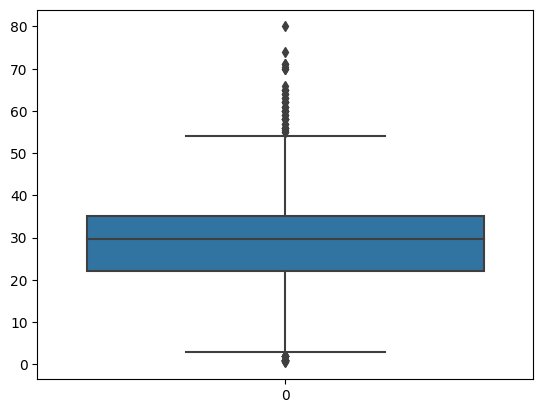

In [132]:
sns.boxplot(df["Age"])

In [137]:
df = df.drop(["Ticket"],axis=1)

In [138]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


<AxesSubplot:>

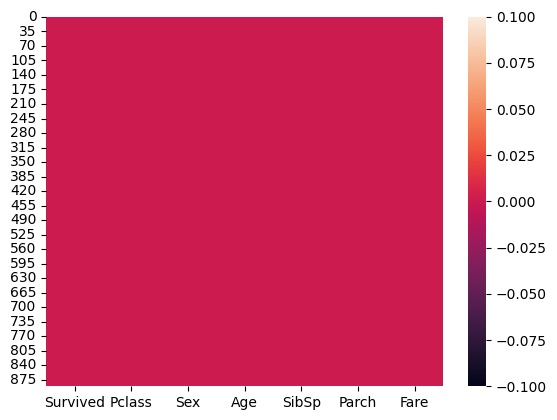

In [139]:
sns.heatmap(df.isna())

In [141]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["Sex"] = lb.fit_transform(df["Sex"])

In [142]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


<AxesSubplot:>

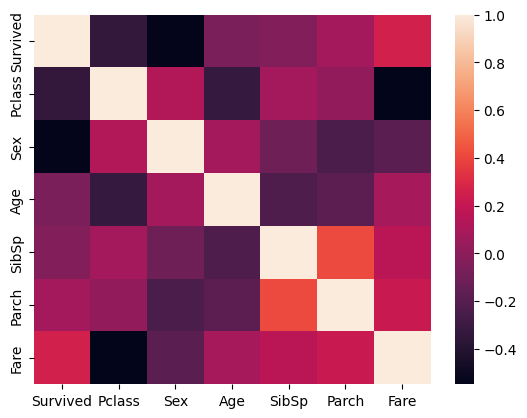

In [144]:
df.corr()
# 0, 1
sns.heatmap(df.corr())

In [149]:
y  = df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [148]:
X = df.drop(["Survived"],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [152]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 42)


(179, 6)

In [158]:
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()
lo.fit(X_train, y_train)

y_pred = lo.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.8100558659217877

In [165]:
from tensorflow.keras.models import Sequential

In [166]:
model = Sequential()

2023-02-06 18:48:23.483691: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-06 18:48:23.483731: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nixcode): /proc/driver/nvidia/version does not exist
2023-02-06 18:48:23.485535: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [174]:
from tensorflow.keras.layers import Dense,ReLU,Dropout

In [170]:
X_train.shape

(712, 6)

In [171]:
model.add(Dense(6, activation='relu'))

In [175]:
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [177]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [178]:
history = model.fit(X_train, y_train, validation_split=0.33, batch_size=30, epochs=100)

Epoch 1/100


/home/nix-code/vrtual/venv/lib/python3.10/site-packages/keras/engine/data_adapter.py:1506: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


16/16 [==============================] - 1s 18ms/step - loss: 0.6508 - accuracy: 0.6122 - val_loss: 0.5948 - val_accuracy: 0.6596
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.5891 - val_loss: 0.5995 - val_accuracy: 0.6596
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.6059 - val_loss: 0.5988 - val_accuracy: 0.6894
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.6164 - val_loss: 0.5938 - val_accuracy: 0.6809
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6505 - accuracy: 0.6205 - val_loss: 0.5896 - val_accuracy: 0.6851
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6379 - accuracy: 0.6520 - val_loss: 0.5860 - val_accuracy: 0.6894
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6417 - accuracy: 0.6436 - val_loss: 0.5884 - val_accuracy: 0.6851
Epoch 8/100
16/16 [=====

Epoch 59/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5578 - accuracy: 0.7379 - val_loss: 0.5220 - val_accuracy: 0.7319
Epoch 60/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.7191 - val_loss: 0.5275 - val_accuracy: 0.7191
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.7128 - val_loss: 0.5162 - val_accuracy: 0.7277
Epoch 62/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5744 - accuracy: 0.7128 - val_loss: 0.5169 - val_accuracy: 0.7277
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.7191 - val_loss: 0.5162 - val_accuracy: 0.7277
Epoch 64/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.7107 - val_loss: 0.5141 - val_accuracy: 0.7319
Epoch 65/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.7317 - val_loss: 0.5119 - val_accuracy: 0.7404
Epoch 

In [181]:
prd = (model.predict(X_test)>=0.5)

In [182]:
acc = accuracy_score(y_test, prd)
acc

0.7486033519553073